In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
womens_clothing=pd.read_excel('C://Users//cheth//OneDrive//Desktop//Alabs Docs//Machine learning//case_study//15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform//Womens Clothing Reviews Data.xlsx')

In [4]:
womens_clothing.tail()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1
23485,1104,General Petite,Dresses,Dresses,Chennai,Mobile,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1


In [5]:
womens_clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
womens_clothing.isna().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [7]:
womens_clothing.shape

(23486, 11)

In [8]:
df=womens_clothing.dropna()

In [9]:
df.shape

(19662, 11)

In [10]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [11]:
df=df.drop(columns=['Product ID'])

In [12]:
df.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [13]:
df.head(4)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0


In [14]:
df['Length']=df['Review Text'].apply(len)

In [15]:
df.head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Length
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,500
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,124


In [16]:
df.dtypes

Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
Length             int64
dtype: object

In [17]:
# distinct values of rating and its count
df['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

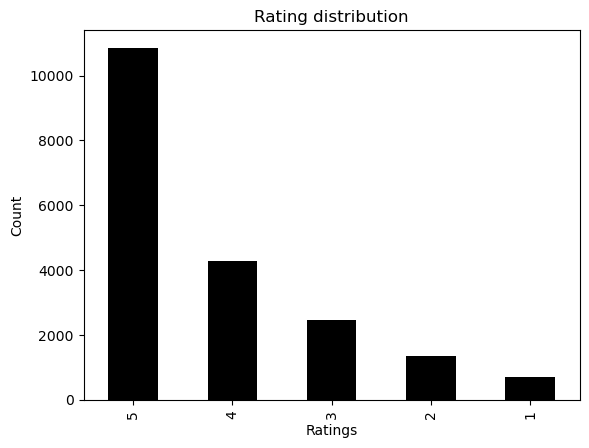

In [18]:
df['Rating'].value_counts().plot(kind='bar',color='black')
plt.title('Rating distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [19]:
df_per_rating=df['Rating'].value_counts()/df.shape[0]
df_per_rating

5    0.552233
4    0.218137
3    0.125318
2    0.069169
1    0.035144
Name: Rating, dtype: float64

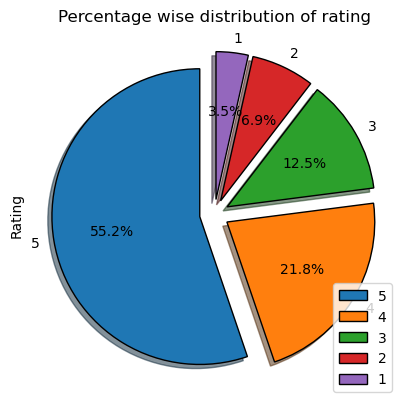

In [20]:
df_per_rating.plot(kind='pie',autopct="%1.1f%%",shadow=True,startangle=90,wedgeprops={'linewidth':1,"edgecolor":'black'},explode=(.1,.1,.1,.1,.1))
plt.legend()
plt.title('Percentage wise distribution of rating')
plt.show()

In [21]:
df.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Length'],
      dtype='object')

In [22]:
# distinct value of Recommend Flag and its count
df['Recommend Flag'].value_counts()

1    16087
0     3575
Name: Recommend Flag, dtype: int64

#### lets find out which one is negative review and positive review

In [23]:
review_0=df.loc[df['Recommend Flag']==0,['Review Text']]
review_0.iloc[0]

Review Text    I had such high hopes for this dress and reall...
Name: 2, dtype: object

In [24]:
review_1=df.loc[df['Recommend Flag']==1,['Review Text']]
review_1.iloc[0]

Review Text    I love, love, love this jumpsuit. it's fun, fl...
Name: 3, dtype: object

In [25]:
# from above 2 conditions we now know that 0 is for negative review and 1 is for positive review

In [26]:
perc_distr=df['Recommend Flag'].value_counts()/df.shape[0]
perc_distr

1    0.818177
0    0.181823
Name: Recommend Flag, dtype: float64

<Axes: ylabel='Recommend Flag'>

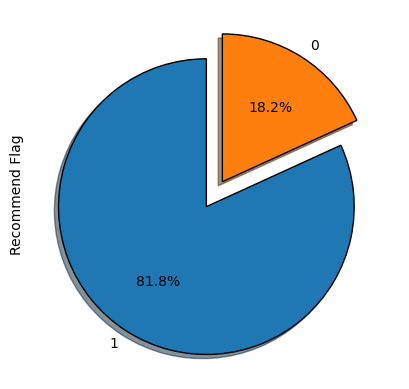

In [27]:
perc_distr.plot(kind='pie',autopct="%0.01f%%",shadow=True,startangle=90,explode=(.1,.1),wedgeprops={'linewidth':1,'edgecolor':'black'})

In [28]:
df[df['Recommend Flag']==0]['Rating'].value_counts()

3    1444
2    1280
1     684
4     146
5      21
Name: Rating, dtype: int64

In [29]:
df[df['Recommend Flag']==1]['Rating'].value_counts()

5    10837
4     4143
3     1020
2       80
1        7
Name: Rating, dtype: int64

In [30]:
df.columns

Index(['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel',
       'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Length'],
      dtype='object')

In [31]:
df['Category'].value_counts()

General           11664
General Petite     6778
Initmates          1220
Name: Category, dtype: int64

In [32]:
# df['Subcategory1'].value_counts()
df['SubCategory2'].value_counts()

Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Lounge             574
Swim               293
Outerwear          281
Shorts             260
Sleep              174
Legwear            131
Intimates          120
Layering           115
Trend              107
Casual bottoms       1
Chemises             1
Name: SubCategory2, dtype: int64

In [97]:
df_sub=df.groupby(by=['Subcategory1'])['Rating'].mean()
df_sub

Subcategory1
Bottoms     4.287688
Dresses     4.137032
Intimate    4.257812
Jackets     4.270762
Tops        4.156433
Trend       3.859813
Name: Rating, dtype: float64

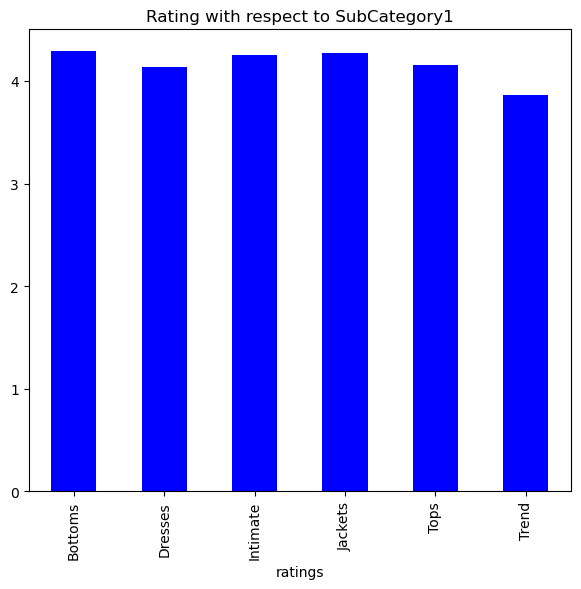

In [100]:
df_sub.plot(kind='bar',color = 'blue', figsize=(7, 6))
plt.title('Rating with respect to SubCategory1')
plt.xlabel('ratings')
plt.show()

In [102]:
df_SubCat2=df.groupby(by=['SubCategory2'])['Rating'].mean()
df_SubCat2

SubCategory2
Blouses           4.152300
Casual bottoms    4.000000
Chemises          4.000000
Dresses           4.137032
Fine gauge        4.255663
Intimates         4.300000
Jackets           4.306020
Jeans             4.349485
Knits             4.133384
Layering          4.347826
Legwear           4.221374
Lounge            4.292683
Outerwear         4.195730
Pants             4.281763
Shorts            4.215385
Skirts            4.244975
Sleep             4.258621
Sweaters          4.165025
Swim              4.153584
Trend             3.859813
Name: Rating, dtype: float64

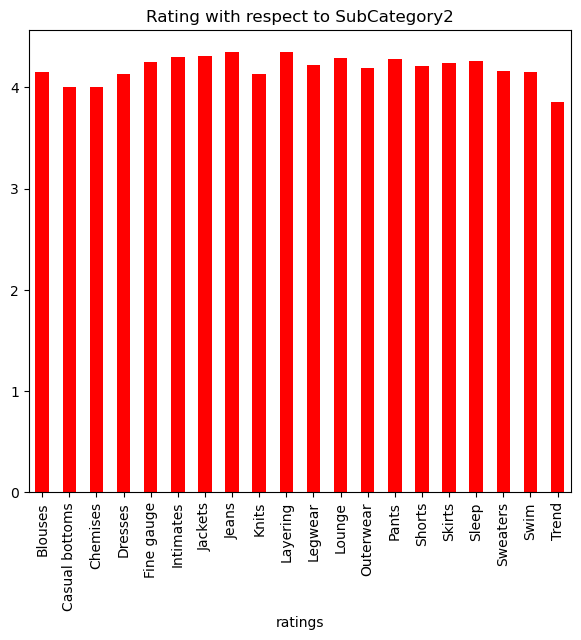

In [105]:
df_SubCat2.plot(kind='bar',color = 'red', figsize=(7, 6))
plt.title('Rating with respect to SubCategory2')
plt.xlabel('ratings')
plt.show()

In [106]:
df_cat=df.groupby(by=['Category'])['Rating'].mean()
df_cat

Category
General           4.166924
General Petite    4.196666
Initmates         4.263115
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

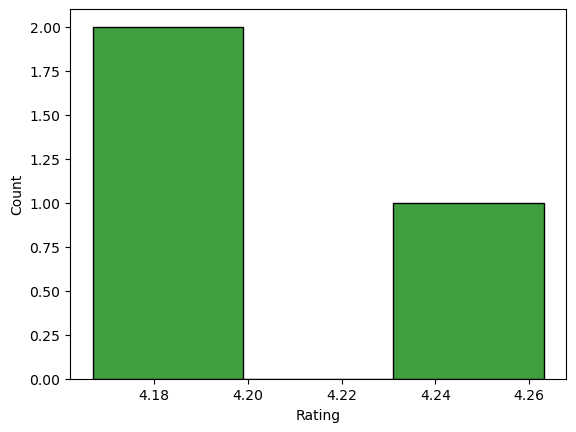

In [107]:
sns.histplot(df_cat,color='green')

In [37]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cheth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df['Review Text'])

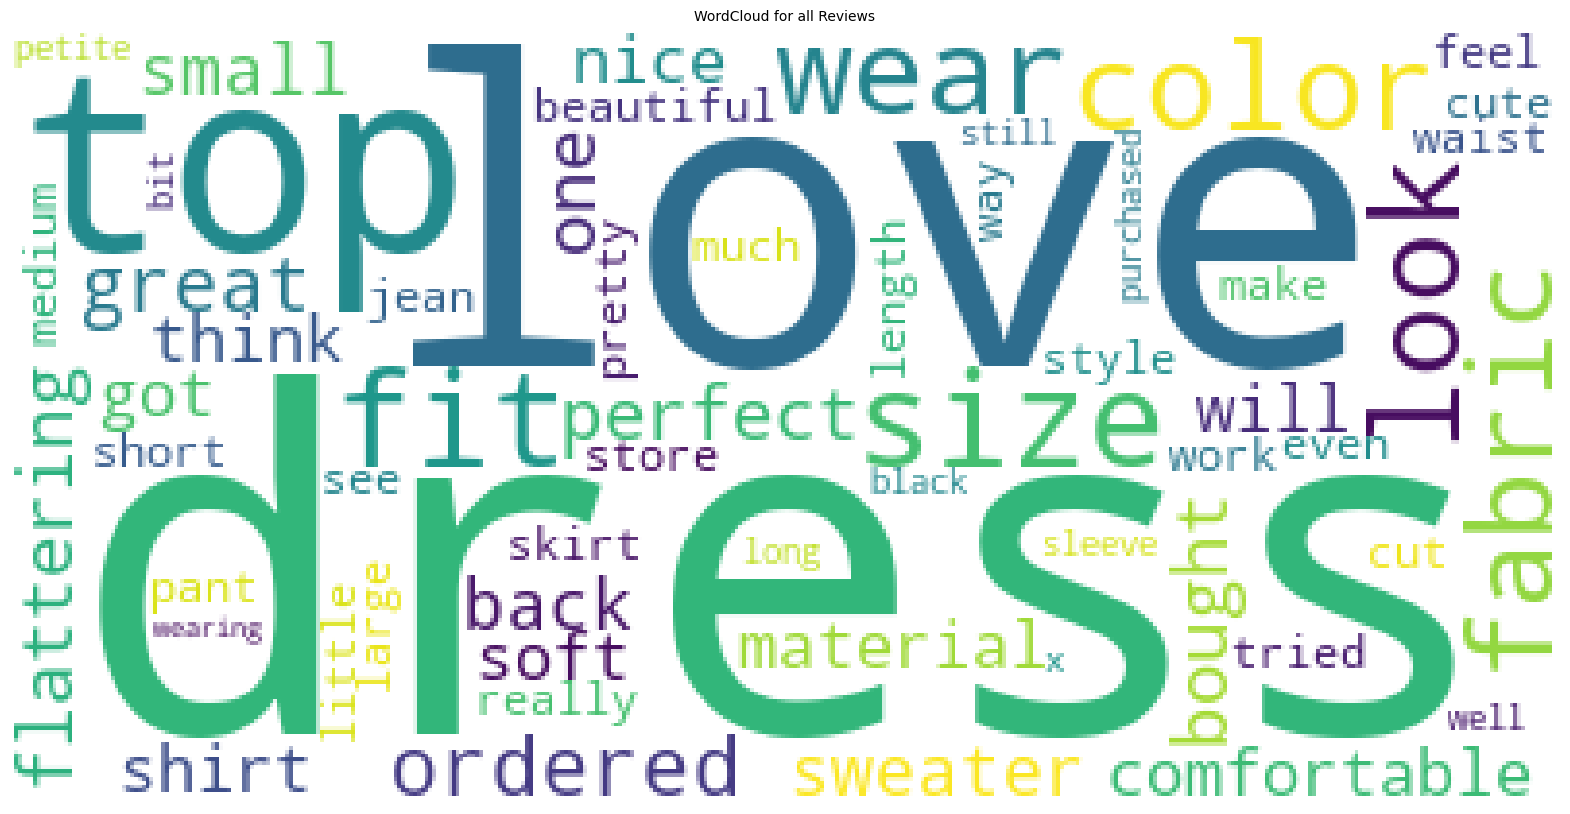

In [40]:
# combine all text
reviews=' '.join([review for review in df['Review Text']])
# initialize word cloud object
wc=WordCloud(background_color='white',max_words=60)
# generate and plot the wordcloud
plt.figure(figsize=(20,20))
plt.imshow(wc.generate(reviews))
plt.title("WordCloud for all Reviews", fontsize=10)
plt.axis('off')
plt.show()

In [41]:
# seperating positive reviews and negative reviews to form positive and negative wordcloud
neg_reviews=" ".join([review for review in df[df['Recommend Flag']==0]['Review Text']])
neg_reviews=neg_reviews.lower().split()

pos_reviews=" ".join([review for review in df[df['Recommend Flag']==1]['Review Text']])
pos_reviews=pos_reviews.lower().split()

unique_neg=[x for x in neg_reviews if x not in pos_reviews]
unique_neg=" ".join(unique_neg)
unique_pos=[x for x in pos_reviews if x not in neg_reviews]
unique_pos=" ".join(unique_pos)


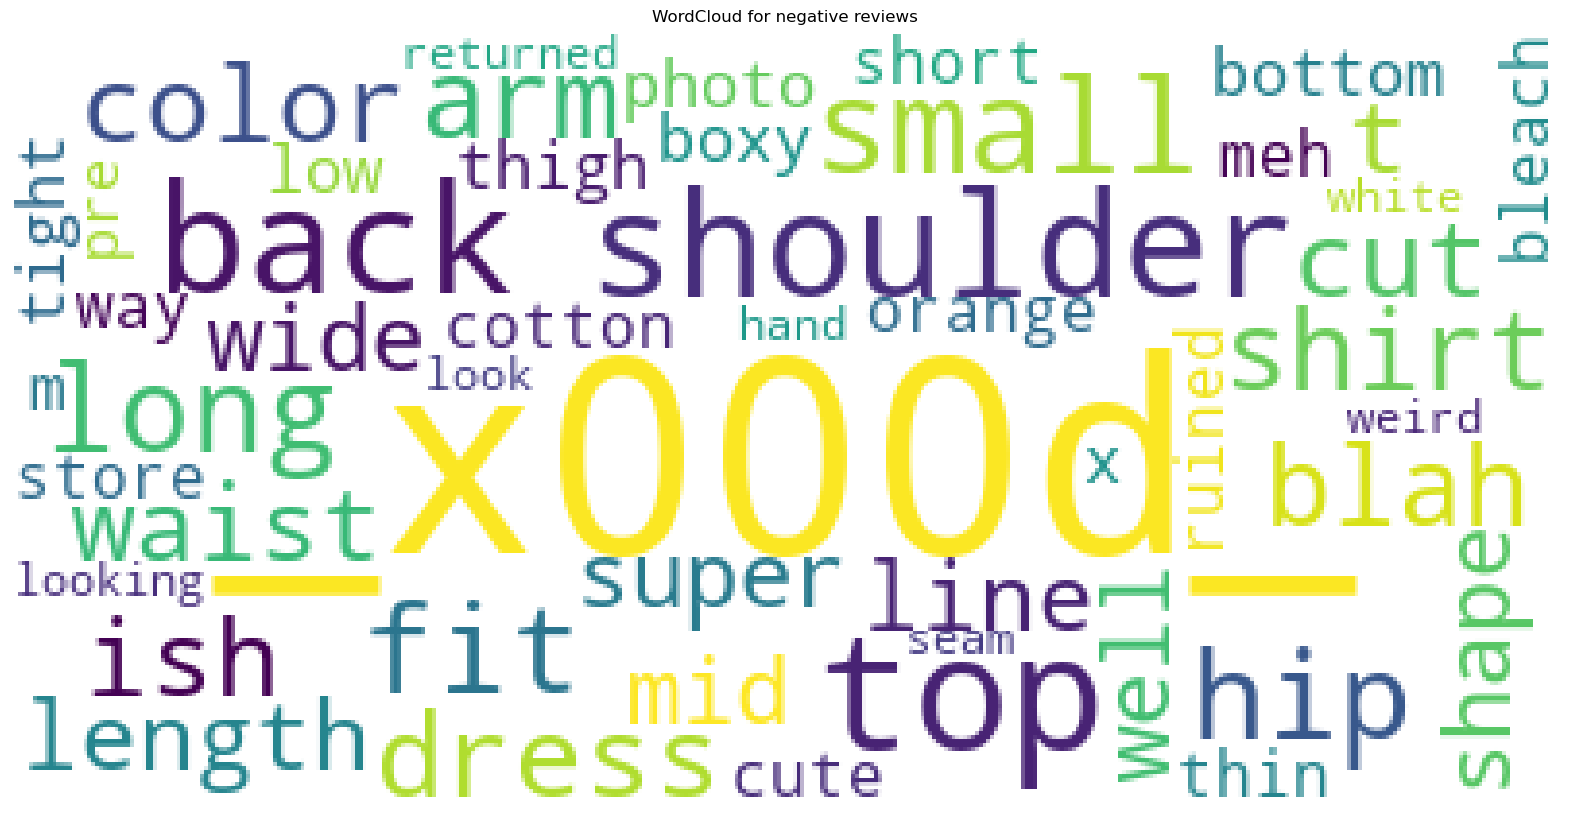

In [42]:
wc=WordCloud(background_color='white',max_words=50)

plt.figure(figsize=(20,20))
plt.imshow(wc.generate(unique_neg))
plt.title('WordCloud for negative reviews')
plt.axis('off')
plt.show()

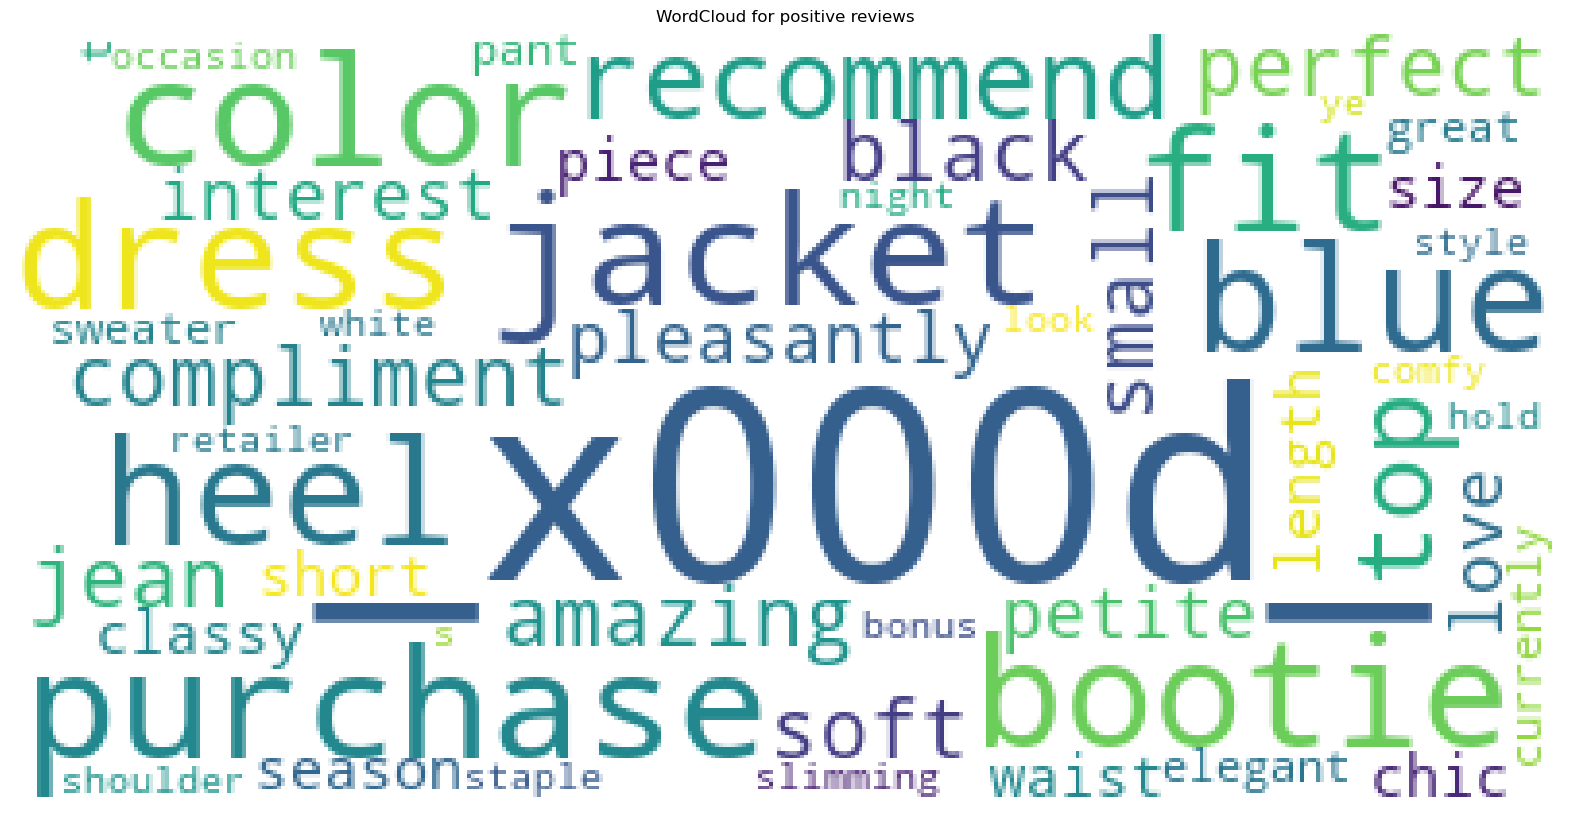

In [43]:
wc=WordCloud(background_color='white',max_words=50)

plt.figure(figsize=(20,20))
plt.imshow(wc.generate(unique_pos))
plt.title('WordCloud for positive reviews')
plt.axis('off')
plt.show()

## preprocessing and modelling

In [44]:
data=[]
stemmer=PorterStemmer()
for i in range(0,df.shape[0]):
#     replace non alphabet char with a space
    review=re.sub('[^a-zA-Z]',' ',df.iloc[i]['Review Text'])
#     convert to lower case
    review=review.lower().split()
#   terate over the individual words and if it is not a stopword then add the stemmed form of the word  
    review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
    review=" ".join(review)
    data.append(review)

## CV to create a bag of words

In [48]:
cv=CountVectorizer(max_features=2500)
# separating features and target 
x=cv.fit_transform(data).toarray()
y=df['Recommend Flag'].values

In [55]:
x.shape,y.shape

((19662, 2500), (19662,))

## Splitting the data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [59]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((13763, 2500), (13763,), (5899, 2500), (5899,))

In [61]:
x_train.max(),x_test.max()

(15, 7)

In [62]:
scaler=MinMaxScaler()
x_train_scl=scaler.fit_transform(x_train)
x_test_scl=scaler.fit_transform(x_test)

## Model Building

### Random forest

In [63]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train_scl,y_train)

RandomForestClassifier()

In [64]:
model_rf.score(x_train_scl,y_train)

1.0

In [65]:
model_rf.score(x_test_scl,y_test)

0.8526868960840821

In [66]:
y_preds=model_rf.predict(x_test_scl)

In [67]:
cm=confusion_matrix(y_test,y_preds)

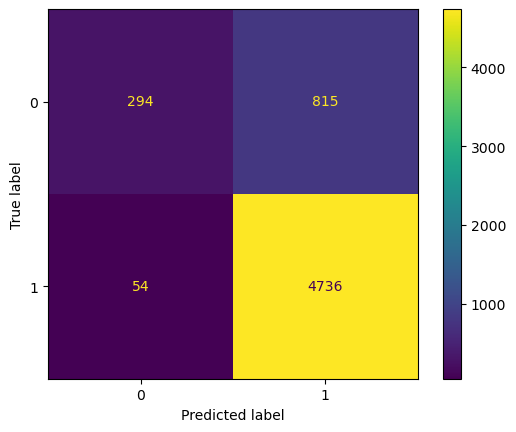

In [68]:
cm_dis=ConfusionMatrixDisplay(cm,display_labels=model_rf.classes_)
cm_dis.plot()
plt.show()

#### we can see and say above model is overfitting, so we will restrict some parameters

In [92]:
params = {
    'bootstrap': [True],
    'max_depth': [50,60,80, 100],
    'min_samples_split': [5,6,8, 12],
    'n_estimators': [100,200,300,400,500,600]
}

In [93]:
RandomForestClassifier?

In [84]:
accuracy = cross_val_score(estimator = model_rf, X=x_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracy.mean())
print("Standard Variance :", accuracy.std())

Accuracy : 0.8575883281822634
Standard Variance : 0.006477622058822112


In [108]:
cv_object = StratifiedKFold(n_splits = 2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(x_train_scl, y_train.ravel())

In [ ]:
grid_search.best_params_

In [ ]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

# XGBoost

In [70]:
model_xgb=XGBClassifier()
model_xgb.fit(x_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
print('Training Accuracy:',model_xgb.score(x_train_scl,y_train))
print('Testing Accuracy:',model_xgb.score(x_test_scl,y_test))

Training Accuracy: 0.9471772142701446
Testing Accuracy: 0.8672656382437701


In [76]:
y_preds_xgb=model_xgb.predict(x_test)

In [75]:
cm=confusion_matrix(y_test,y_preds)
cm

array([[ 294,  815],
       [  54, 4736]], dtype=int64)

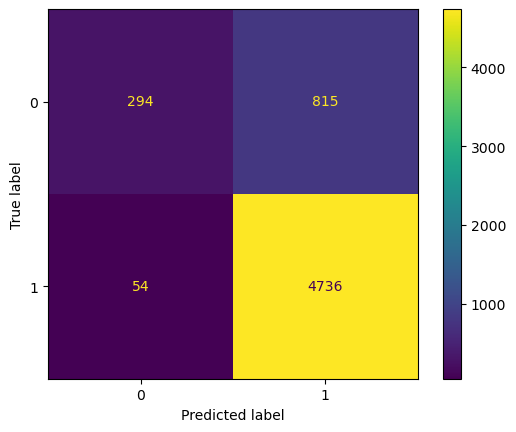

In [78]:
cm_dis=ConfusionMatrixDisplay(cm,display_labels=model_xgb.classes_)
cm_dis.plot()
plt.show()